In [1]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pingouin

In [2]:
base_path = "./data/"

### Data exploration

In [3]:
data = pd.read_csv(f"{base_path}sign_data.tsv", encoding="utf-8", sep="\t")

In [4]:
data

sign_code    fr_gloss     en_gloss  familiarity_mean  familiarity_std  \
0      SM0001      mignon         cute          4.250000         1.183216   
1      SM0002       vomir        vomit          3.375000         1.147461   
2      SM0003     réviser       revise          3.750000         1.290994   
3      SM0004  comprendre   understand          4.812500         0.543906   
4      SM0005    demander          ask          4.687500         0.704154   
..        ...         ...          ...               ...              ...   
541    SM0542    inventer       invent          3.928571         1.141139   
542    SM0543     deprime  depression           3.785714         1.121714   
543    SM0544    francais       french          4.357143         0.744946   
544    SM0545      casser        break          4.142857         1.099450   
545    SM0546       perdu         lost          3.071429         1.328057   

     familiarity_zscore  concreteness_mean  concreteness_std  \
0              0.328559           3.937500          1.436141   
1             -0.456296           4.625000          0.500000   
2             -0.130091           3.625000          1.408309   
3              0.851360           3.312500          1.493039   
4              0.749085           3.312500          1.662077   
..                  ...                ...               ...   
541            0.111814           2.928571          1.491735   
542           -0.038602           3.000000          1.467599   
543            0.539971           2.857143          1.657484   
544            0.339223           3.785714          1.188313   
545           -0.693800           2.571429          1.554858   

     concreteness_zscore  iconicity_mean  iconicity_std  iconicity_zscore  \
0               0.377053        2.437500       1.459166         -0.498029   
1               0.871860        4.750000       0.447214          1.170127   
2               0.126185        2.312500       1.250000         -0.553407   
3              -0.030738        2.875000       1.360147         -0.164863   
4              -0.029932        2.375000       1.310216         -0.507239   
..                   ...             ...            ...               ...   
541            -0.339217        3.214286       1.251373          0.038018   
542            -0.318095        3.357143       1.215739          0.131361   
543            -0.487273        2.214286       1.368805         -0.788331   
544             0.291906        3.928571       1.071612          0.557399   
545            -0.761571        2.714286       1.437336         -0.357620   

     count  
0       16  
1       16  
2       16  
3       16  
4       16  
..     ...  
541     14  
542     14  
543     14  
544     14  
545     14  

[546 rows x 13 columns]

Examples of highest or lowest ranked signs.

In [5]:
data[["fr_gloss","familiarity_mean"]].nlargest(n=5, columns=["familiarity_mean"])

fr_gloss  familiarity_mean
499       sourd          5.000000
392      manger          4.928571
436         eau          4.928571
157          ou          4.866667
165  travailler          4.866667

In [6]:
data[["fr_gloss","concreteness_mean"]].nsmallest(n=5, columns=["concreteness_mean"])

fr_gloss  concreteness_mean
167  handisport           1.466667
247    decoller           1.666667
16      verglas           1.750000
213      besoin           1.866667
312        amer           1.866667

Data distribution

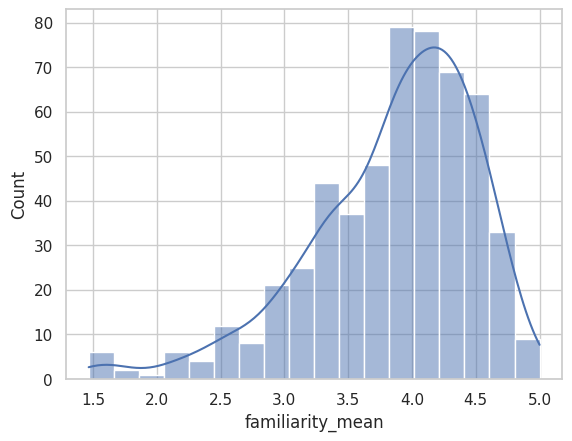

In [7]:
sns.set_theme(style="whitegrid", palette="deep")

histfreq = sns.histplot(data=data["familiarity_mean"], kde=True)
histfreq.figure.savefig("hist_fam_mean.jpg")

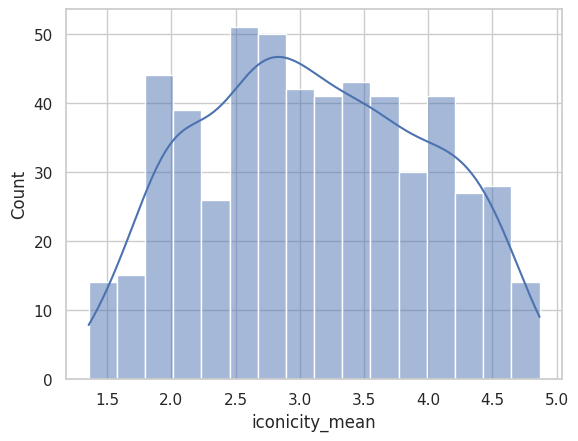

In [8]:
histicon = sns.histplot(data=data["iconicity_mean"], kde=True, bins=16)
histicon.figure.savefig("hist_icon_mean.jpg")

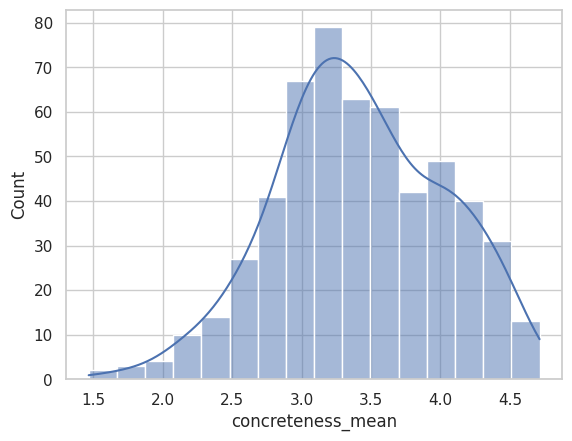

In [9]:
histconc = sns.histplot(data["concreteness_mean"], kde=True)
histconc.figure.savefig("hist_conc_mean.jpg")

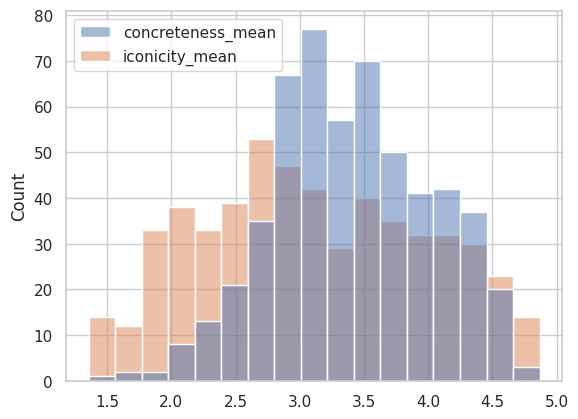

In [10]:
hist_conc_icon = sns.histplot(data[["concreteness_mean", "iconicity_mean"]])
# hist_conc_icon.figure.savefig("hist_conc_icon_mean.jpg")

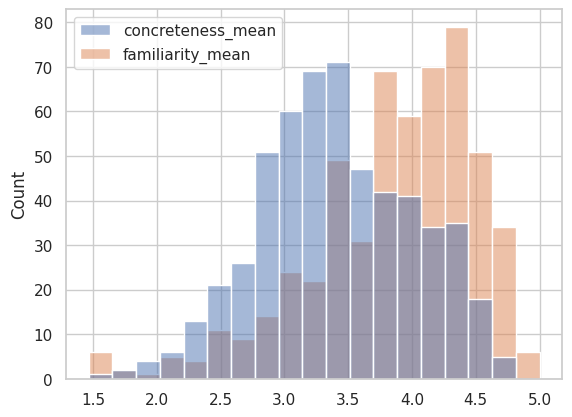

In [11]:
hist_conc_icon = sns.histplot(data[["concreteness_mean", "familiarity_mean"]])
# hist_conc_icon.figure.savefig("hist_conc_fam_mean.jpg")

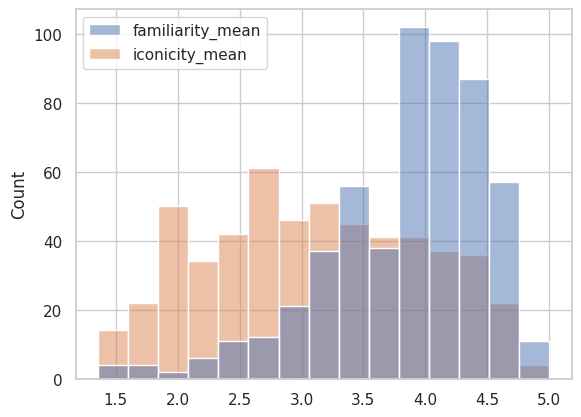

In [12]:
hist_conc_icon = sns.histplot(data[["familiarity_mean", "iconicity_mean"]])
# hist_conc_icon.figure.savefig("hist_conc_fam_mean.jpg")

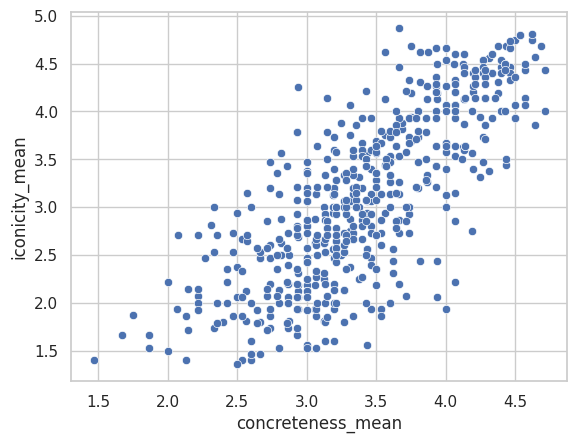

In [13]:
scatterplot = sns.scatterplot(data=data, x="concreteness_mean", y="iconicity_mean")
scatterplot.figure.savefig("scatterplot_conc_ico_mean.png")

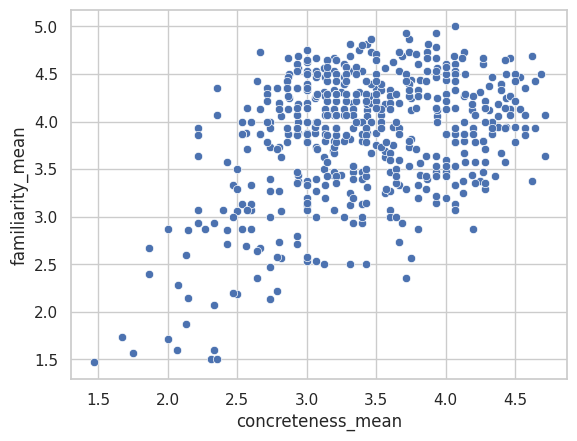

In [14]:
scatterplot = sns.scatterplot(data=data, x="concreteness_mean", y="familiarity_mean")
scatterplot.figure.savefig("scatterplot_fam_conc_mean.png")

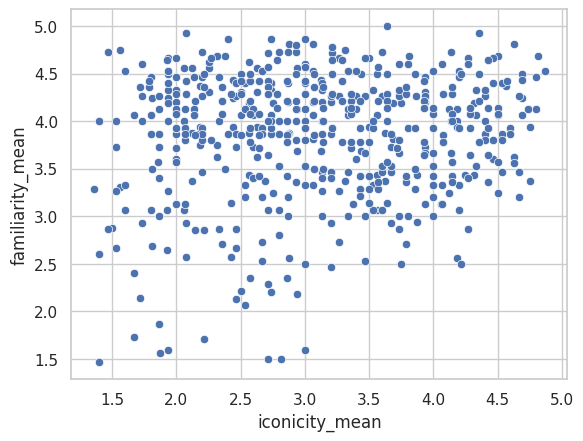

In [15]:
scatterplot = sns.scatterplot(data=data, x="iconicity_mean", y="familiarity_mean")
scatterplot.figure.savefig("scatterplot_ico_fam_mean.png")

Data correlation

In [16]:
res = spearmanr(data["familiarity_mean"], data["concreteness_mean"], nan_policy="omit", alternative="two-sided")
print("Correlation between familiarity and concreteness scores:")
print(res)

Correlation between familiarity and concreteness scores:
SignificanceResult(statistic=0.25692179592896397, pvalue=1.1137026249060184e-09)


In [17]:
res = spearmanr(data["familiarity_mean"], data["iconicity_mean"], nan_policy="omit", alternative="two-sided")
print("Correlation between familiarity and iconicity scores:")
print(res)

Correlation between familiarity and iconicity scores:
SignificanceResult(statistic=0.02508576615912329, pvalue=0.5586023089716554)


In [18]:
res = spearmanr(data["iconicity_mean"], data["concreteness_mean"], nan_policy="omit", alternative="two-sided")
print("Correlation between concreteness and iconicity scores:")
print(res)

Correlation between concreteness and iconicity scores:
SignificanceResult(statistic=0.7655027370590909, pvalue=2.9861610186891185e-106)


### Metadata exploration

In [19]:
data_df = pd.read_csv(f"{base_path}data.tsv", encoding="utf-8", sep="\t")
metadata_df = pd.read_csv(f"{base_path}metadata.tsv", encoding="utf-8", sep="\t")

id_natives = metadata_df[metadata_df['native'] == True]['participant_id']
id_non_natives = metadata_df[metadata_df['native'] == False]['participant_id']

No. of participants

In [20]:
metadata_df['participant_id'].count()

33

No. of deaf participants

In [21]:
metadata_df[metadata_df['deafness'] == True]['participant_id'].count()

30

Participants grouped by sex

In [22]:
metadata_df[['participant_id', 'sex']].groupby('sex').count()

participant_id
sex                   
female              19
male                14

No. of native participants

In [23]:
metadata_df[['participant_id', 'native']].groupby('native').count()

participant_id
native                
False               13
True                20

Age of acquisition

In [24]:
metadata_df[metadata_df['native'] == False][['participant_id', 'age_of_acquisition']].groupby('age_of_acquisition').count()

participant_id
age_of_acquisition                
2                                1
6                                1
9                                1
10                               2
11                               1
12                               1
16                               4
19                               1
24                               1

Age median

In [25]:
metadata_df['age'].median()

27.0

Natives grouped by frequency of exposure

In [26]:
metadata_df[metadata_df["participant_id"].isin(id_natives)][["participant_id", "frequency_of_exposure"]].groupby("frequency_of_exposure").count()

participant_id
frequency_of_exposure                
every_day                          17
often                               2
sometimes                           1

Non-natives grouped by frequency of exposure

In [27]:
metadata_df[metadata_df["participant_id"].isin(id_non_natives)][["participant_id", "frequency_of_exposure"]].groupby("frequency_of_exposure").count()

participant_id
frequency_of_exposure                
every_day                           7
often                               2
rarely                              1
sometimes                           3

AoA mean

In [28]:
metadata_df.drop(metadata_df[metadata_df.age_of_acquisition == 0].index)['age_of_acquisition'].mean()

12.846153846153847

Receptive skill assessment mean

In [29]:
metadata_df['receptive_skill_assessment'].mean()

6.9393939393939394

### Explorative analysis of native and non-native ratings

In [30]:
for factor in ("familiarity", "concreteness", "iconicity"):
    mean_natives = data_df[data_df["participant_id"].isin(id_natives)][[factor, 'sign_code']].groupby("sign_code").mean()
    mean_non_natives = data_df[data_df["participant_id"].isin(id_non_natives)][[factor, 'sign_code']].groupby("sign_code").mean()
    
    natives = np.array(mean_natives[factor].values)
    not_natives = np.array(mean_non_natives[factor].values)
    diff = natives-not_natives
    print(f"{factor} -----")
    print(pingouin.wilcoxon(diff, alternative="two-sided"))


familiarity -----
            W-val alternative         p-val       RBC  CLES
Wilcoxon  20707.5   two-sided  3.196269e-45  0.706788   NaN
concreteness -----
            W-val alternative     p-val       RBC  CLES
Wilcoxon  62245.5   two-sided  0.126399 -0.077434   NaN
iconicity -----
            W-val alternative         p-val       RBC  CLES
Wilcoxon  27661.5   two-sided  1.444139e-31 -0.591592   NaN


In [31]:
data_merged = data_df.merge(metadata_df[['participant_id', 'native']], on='participant_id')[['participant_id', 'sign_code', 'familiarity', 'concreteness', 'iconicity', 'native']]

data2plot = data_merged.melt(id_vars=['participant_id', 'sign_code', 'native'], value_vars=['familiarity', 'concreteness', 'iconicity'], var_name='factor', value_name='score')
data2plot['native'] = data2plot['native'].replace([True, False], ['native', 'non-native'])
data2plot = data2plot.groupby(['sign_code', 'native', 'factor'], as_index=False).agg({'score': 'mean'})

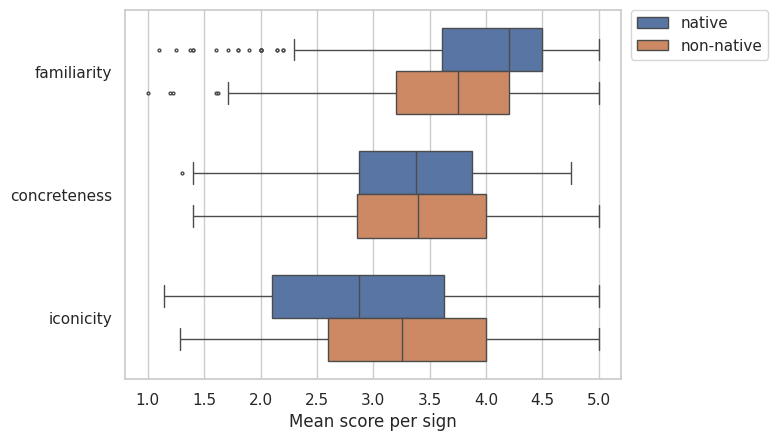

In [32]:
data_merged = data_df.merge(metadata_df[['participant_id', 'native']], on='participant_id')[['participant_id', 'sign_code', 'familiarity', 'concreteness', 'iconicity', 'native']]

data2plot = data_merged.melt(id_vars=['participant_id', 'sign_code', 'native'], value_vars=['familiarity', 'concreteness', 'iconicity'], var_name='factor', value_name='score')
data2plot['native'] = data2plot['native'].replace([True, False], ['native', 'non-native'])
data2plot = data2plot.groupby(['sign_code', 'native', 'factor'], as_index=False).agg({'score': 'mean'})

bxplot = sns.boxplot(data2plot, x='score', y='factor', hue='native', orient="h", width=0.7, order=['familiarity', 'concreteness', 'iconicity'], fliersize=2)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("")
plt.xlabel("Mean score per sign")
plt.show()
bxplot.figure.savefig("boxplot_natives_non-natives.jpg", bbox_inches = "tight")

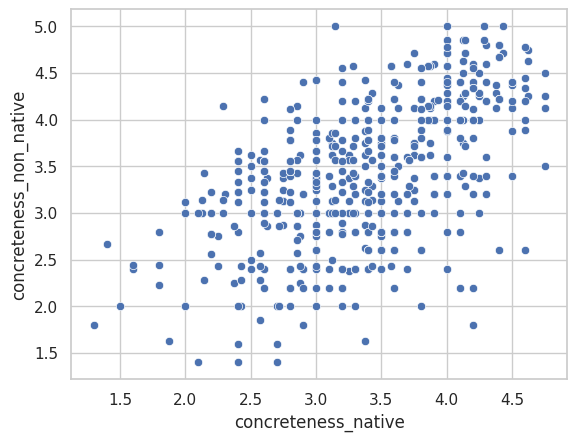

In [33]:
conc_native = data2plot[(data2plot['factor'] == "concreteness") & (data2plot['native'] == 'native')]
conc_non_native = data2plot[(data2plot['factor'] == "concreteness") & (data2plot['native'] == 'non-native')]

scatterplot_line_conc_natives = sns.scatterplot(x=conc_native['score'].to_list(), y=conc_non_native['score'].to_list())

scatterplot_line_conc_natives.set(xlabel='concreteness_native',
       ylabel='concreteness_non_native',
       title='')

scatterplot_line_conc_natives.figure.savefig("scatterplot_line_conc_natives.png")

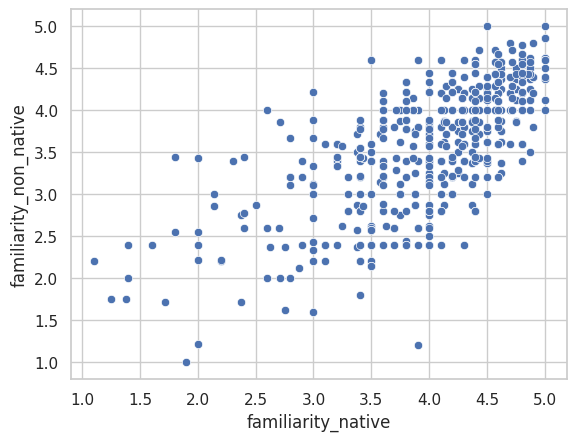

In [34]:
fam_native = data2plot[(data2plot['factor'] == "familiarity") & (data2plot['native'] == 'native')]
fam_non_native = data2plot[(data2plot['factor'] == "familiarity") & (data2plot['native'] == 'non-native')]

scatterplot_line_fam_natives = sns.scatterplot(x=fam_native['score'].to_list(), y=fam_non_native['score'].to_list())

scatterplot_line_fam_natives.set(xlabel='familiarity_native',
       ylabel='familiarity_non_native',
       title='')

scatterplot_line_fam_natives.figure.savefig("scatterplot_line_fam_natives.png")

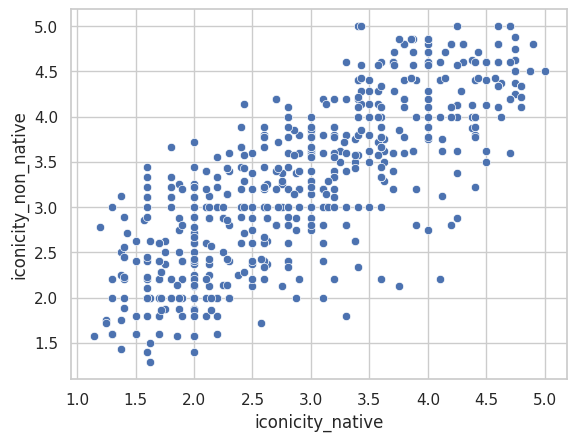

In [35]:
icon_native = data2plot[(data2plot['factor'] == "iconicity") & (data2plot['native'] == 'native')]
icon_non_native = data2plot[(data2plot['factor'] == "iconicity") & (data2plot['native'] == 'non-native')]

scatterplot_line_icon_natives = sns.scatterplot(x=icon_native['score'].to_list(), y=icon_non_native['score'].to_list())

scatterplot_line_icon_natives.set(xlabel='iconicity_native',
       ylabel='iconicity_non_native',
       title='')

scatterplot_line_icon_natives.figure.savefig("scatterplot_line_icon_natives.png")

### Data realibility

In [36]:
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
pandas2ri.activate()

psych = importr("psych")
df = pd.read_csv('data/raw_data.tsv', sep="\t")


#### Familiarity ratings by section

In [37]:
for group in ("A", "B", "C", "D", "E"):
    df_group = df[df['group'] == group]
    factor = "familiarity"
    df_group = df_group[['sign_code', 'participant_id', factor]].pivot_table(index="sign_code", columns="participant_id", values=factor)
    r_df = pandas2ri.py2rpy(df_group)
    # Calculate ICC in R
    icc_result = psych.ICC(r_df, lme=True)
    res = pandas2ri.rpy2py_dataframe(icc_result[0])
    print(f"group: {group}, factor: {factor}")
    display(res[res['type'] == "ICC2k"])

group: A, factor: familiarity


type       ICC        F    df1     df2             p  \
Average_random_raters  ICC2k  0.816586  8.41871  108.0  1620.0  1.154465e-95   

                       lower bound  upper bound  
Average_random_raters     0.742205     0.870982

group: B, factor: familiarity


type      ICC         F    df1     df2             p  \
Average_random_raters  ICC2k  0.81992  8.028525  108.0  1512.0  5.416581e-89   

                       lower bound  upper bound  
Average_random_raters     0.749939     0.872216

group: C, factor: familiarity


type       ICC         F    df1     df2             p  \
Average_random_raters  ICC2k  0.784585  7.339701  109.0  1526.0  1.315589e-80   

                       lower bound  upper bound  
Average_random_raters     0.695349     0.849067

group: D, factor: familiarity


type       ICC         F    df1     df2             p  \
Average_random_raters  ICC2k  0.796762  8.464731  108.0  1512.0  1.145919e-94   

                       lower bound  upper bound  
Average_random_raters     0.704603     0.860448

group: E, factor: familiarity


type       ICC         F    df1     df2             p  \
Average_random_raters  ICC2k  0.779956  7.743809  109.0  1417.0  1.763332e-84   

                       lower bound  upper bound  
Average_random_raters     0.679642     0.849025

#### Concreteness ratings by section

In [38]:
for group in ("A", "B", "C", "D", "E"):
    df_group = df[df['group'] == group]
    print(group)
    factor = "concreteness"
    df_group = df_group[['sign_code', 'participant_id', factor]].pivot_table(index="sign_code", columns="participant_id", values=factor)
    r_df = pandas2ri.py2rpy(df_group)
    # Calculate ICC in R
    icc_result = psych.ICC(r_df, lme=True)
    res = pandas2ri.rpy2py_dataframe(icc_result[0])
    print(f"group: {group}, factor: {factor}")
    display(res[res['type'] == "ICC2k"])

A
group: A, factor: concreteness


type       ICC         F    df1     df2             p  \
Average_random_raters  ICC2k  0.685871  4.247905  108.0  1620.0  7.710729e-38   

                       lower bound  upper bound  
Average_random_raters     0.583649     0.769087

B
group: B, factor: concreteness


type      ICC         F    df1     df2             p  \
Average_random_raters  ICC2k  0.74867  5.460949  108.0  1512.0  2.715659e-54   

                       lower bound  upper bound  
Average_random_raters     0.659976     0.818154

C
group: C, factor: concreteness


type       ICC         F    df1     df2             p  \
Average_random_raters  ICC2k  0.627763  3.833144  109.0  1526.0  5.564484e-32   

                       lower bound  upper bound  
Average_random_raters     0.503788     0.727267

D
group: D, factor: concreteness


type       ICC         F    df1     df2             p  \
Average_random_raters  ICC2k  0.755793  5.750982  108.0  1512.0  2.646763e-58   

                       lower bound  upper bound  
Average_random_raters     0.667275     0.824233

E
group: E, factor: concreteness


type       ICC         F    df1     df2             p  \
Average_random_raters  ICC2k  0.675367  4.653613  109.0  1417.0  6.908549e-43   

                       lower bound  upper bound  
Average_random_raters     0.554432     0.767432

#### Iconicity ratings by section

In [39]:
for group in ("A", "B", "C", "D", "E"):
    df_group = df[df['group'] == group]
    factor = "iconicity"
    df_group = df_group[['sign_code', 'participant_id', factor]].pivot_table(index="sign_code", columns="participant_id", values=factor)
    r_df = pandas2ri.py2rpy(df_group)
    # Calculate ICC in R
    icc_result = psych.ICC(r_df, lme=True)
    res = pandas2ri.rpy2py_dataframe(icc_result[0])
    print(f"group: {group}, factor: {factor}")
    display(res[res['type'] == "ICC2k"])

group: A, factor: iconicity


type       ICC          F    df1     df2  \
Average_random_raters  ICC2k  0.892612  11.274153  108.0  1620.0   

                                   p  lower bound  upper bound  
Average_random_raters  4.468669e-132     0.857472     0.921277

group: B, factor: iconicity


type       ICC          F    df1     df2  \
Average_random_raters  ICC2k  0.909694  16.434683  108.0  1512.0   

                                   p  lower bound  upper bound  
Average_random_raters  4.202720e-186     0.871623        0.937

group: C, factor: iconicity


type      ICC         F    df1     df2              p  \
Average_random_raters  ICC2k  0.83908  9.284077  109.0  1526.0  4.407669e-106   

                       lower bound  upper bound  
Average_random_raters     0.773703     0.886793

group: D, factor: iconicity


type       ICC          F    df1     df2  \
Average_random_raters  ICC2k  0.879903  13.191275  108.0  1512.0   

                                   p  lower bound  upper bound  
Average_random_raters  1.452110e-151      0.82639     0.917195

group: E, factor: iconicity


type       ICC         F    df1     df2             p  \
Average_random_raters  ICC2k  0.751386  5.169392  109.0  1417.0  5.497695e-50   

                       lower bound  upper bound  
Average_random_raters     0.667795     0.818382